<a href="https://colab.research.google.com/github/Abd-Alfatah/simple_neural-network/blob/master/Energy_effeciency_with_BPNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import random 
import math #we can import also mpmath for working with bigger values
# the data used in this program can be found at this link
#https://archive.ics.uci.edu/ml//datasets/Energy+efficiency
# link to the training 
#https://colab.research.google.com/drive/1wXlUYlTh6b7tX5fTRzQpSNiN76ukLTk_
# for object name file1. to store the weghts and learning rates
file1 = open("MyFile.txt","a")


# We perform energy analysis using 12 different building shapes simulated in Ecotect. The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. We simulate various settings as functions of the afore-mentioned characteristics to obtain 768 building shapes. The dataset comprises 768 samples and 8 features, aiming to predict two real valued responses. It can also be used as a multi-class classification problem if the response is rounded to the nearest integer.
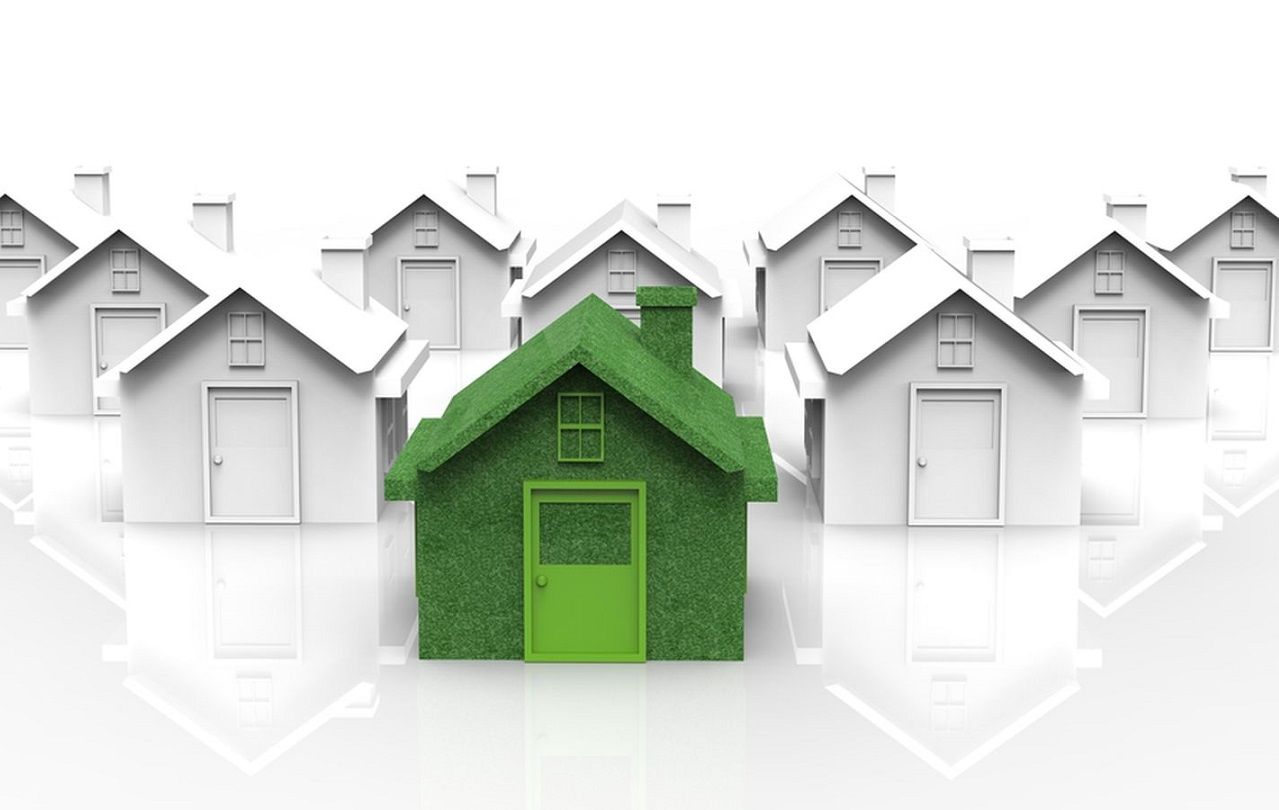




In [ ]:
# In this module we clean the data, split,plot,and load it.
class dataCleaningandSplitting:
    global minmax
    minmax= list()
    def __init__(self,data) -> None:
        self.data=data
    def dataCleaning(self):
        data.info()
        #data.dropna() # we do not need this as our data does not contain any kind null data
        for i in range (len(data)):
            if data.loc[i,"X5"]>10 or data.loc[i,"X5"]<1:
                data.loc[i,"X5"]=data.mode()  
    def plotting(self):
        x=[]
        y=[]
        x=list(data["X3"])
        y=list(data['Y1'])
        print(x)
        print(y)
        #data.plot(x,y)
        #plt.show()
    #max and min in the dataset
    def dataset_minmax(self):
        stats=[]
        for column in (data.columns):
            stats.append([min(data[column]),max(data[column])])
        return stats
    # Rescale dataset columns to the range 0-1
    def normalize_dataset(self):
        minmax=self.dataset_minmax()
        #convertinf all the data integers into floats
        for column in data.columns:
            data[column] = data[column].astype(float)
        """figure1=plt.figure()
        plt.plot(list(data["X5"]),list(data['Y2']))
        plt.xlabel("floor area")
        plt.ylabel=("heat load")
        plt.title("energy effciency")
        plt.grid()
        plt.show()"""
        #data.plot(kind='scatter', x=data["X3"],y=data['Y1'])
        for x in range(len(data)):
            for y in range(len(data.columns)):
                data.loc[x,data.columns[y]] = (data.loc[x,data.columns[y]] - minmax[y][0]) / (minmax[y][1] - minmax[y][0])
        figure2=plt.figure()
        """plt.plot(list(data["X5"]),list(data['Y2']))
        plt.xlabel("floor area")
        plt.ylabel=("heat load")
        plt.title("energy effciency")
        plt.grid()
        plt.show()"""
    def trainig_data(self):
        self.normalize_dataset()
        trainingSet=np.matrix(data.iloc[:550,:])
        trainingSet=np.asfarray(trainingSet, int)
        return  trainingSet
    def testing_data(self):
        self.normalize_dataset()
        testingSet=np.matrix(data.iloc[550:,:])
        testingSet=np.asfarray(testingSet, int)
        return testingSet
    
    def testing(self):
        self.normalize_dataset()
        testingSet=np.matrix(data)
        testingSet=np.asfarray(testingSet, int)
        return testingSet

So our model consits o the following:
The dataset contains eight attributes (or features, denoted by X1...X8) and two responses (or outcomes, denoted by y1 and y2). The aim is to use the eight features to predict each of the two responses.

**Specifically**:

**X1: Relative Compactnes**

**X2 Surface Area**

**X3 Wall Area**

**X4 Roof Area**

**X5 Overall Height**

**X6 Orientation**

**X7 Glazing Area**

**X8 Glazing Area Distribution**

**y1 Heating Load**

**y2 Cooling Load**


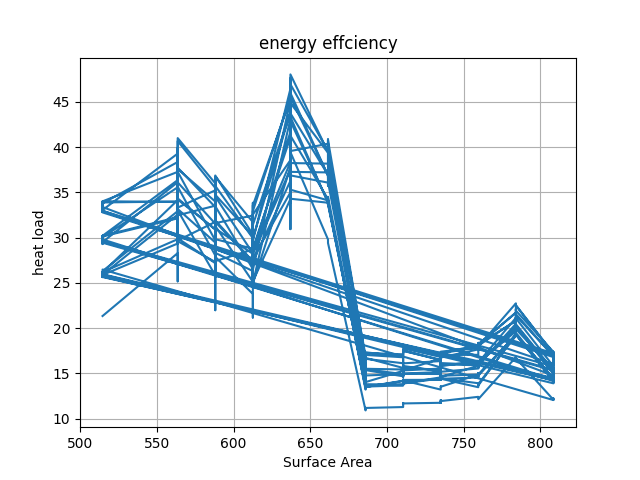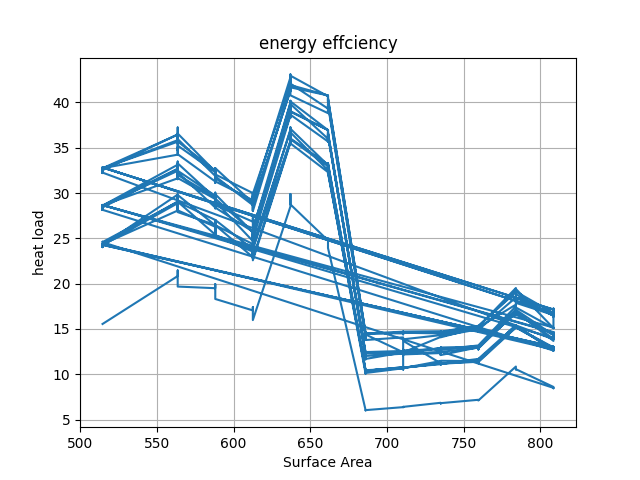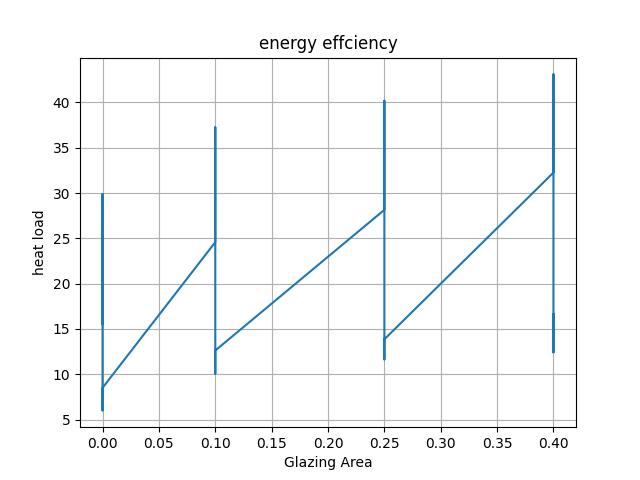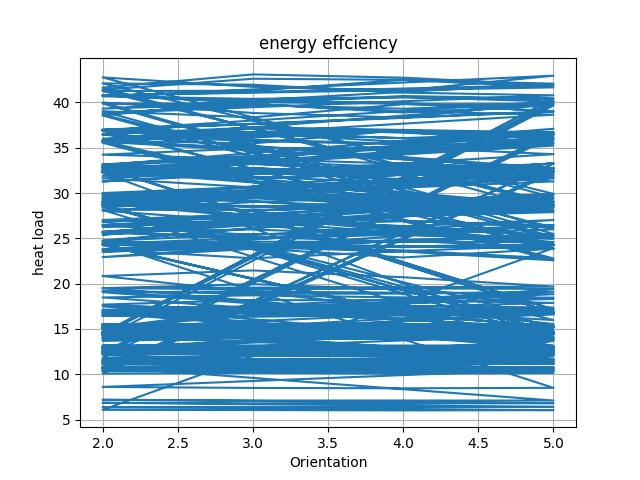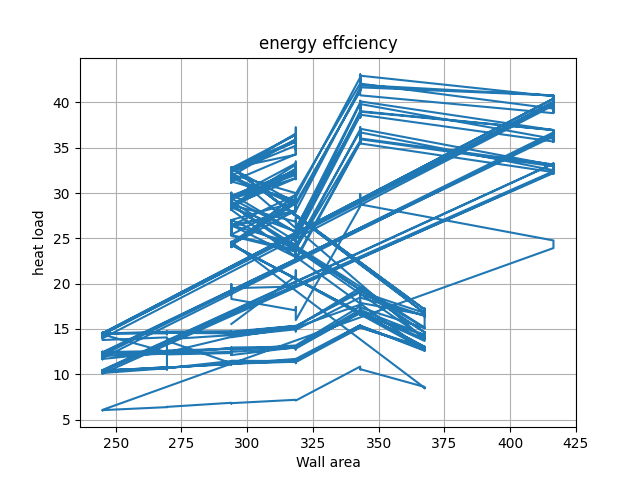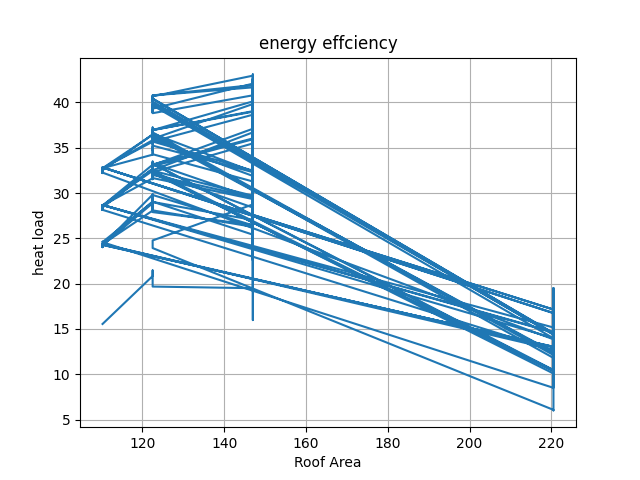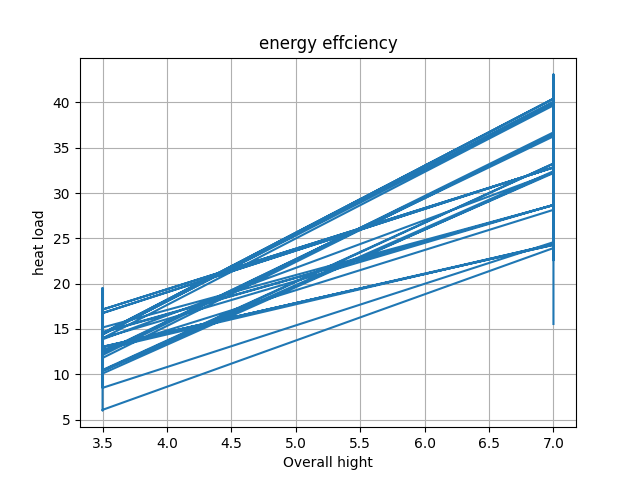

In [ ]:
class Backpropagation:
    def initialize(self, nInputs, nHidden, nOutputs):
        network = list()
        hiddenLayer =[ {'weights': [-2.2001276178941978, 0.5514642996211089, 0.7893558137118839, 0.5433378428083542, -0.6434265970021423, -0.010121084808065879, -0.7057072306486339, -0.0685362844314962, -0.5078764888841119], 'output': 0.16785197116896372, 'delta': -0.009337820979930538}\
                      ,{'weights': [7.991573788935629, -4.651288012082933, -5.708754551511339, -0.3853830444770837, -7.395435508534871, -0.029979678183401436, -2.416792664019057, -0.07892424987479642, 2.0160867722788973], 'output': 2.784876897650075e-06, 'delta': -5.158563297627446e-08}\
                      ,{'weights': [-9.440113814798154, 6.952344468146128, 24.500996492906665, -11.286487410660039, -1.8212969402607821, 0.2144865495065559, 0.07803268074165186, 0.0686292528237487, -5.211114193516906], 'output': 0.9999999062657517, 'delta': 4.123998201192046e-10}\
                      ,{'weights': [-2.154492008529652, 5.456430346118951, 29.552253234790836, -15.340378459050859, -8.869746221954921, 0.12747046378122248, 1.7135040316288077, -0.2427743243756696, -3.1316751219803955], 'output': 0.9999999964065098, 'delta': 3.0543865676243907e-11}\
                      ,{'weights': [4.4745925623075395, -3.0769442704243346, -1.2506142420139414, -3.572951597836042, -0.9010472748693382, 0.1557529206661503, 5.1004180891252044, -0.4130599590447297, -2.894862593023993], 'output': 0.45694844029711923, 'delta': 0.0013708956025267327}\
                      ,{'weights': [6.658207787206209, -3.706858724075429, -12.862568805490637, 6.64447866514236, 6.4084300906837575, -0.07840345528833127, 0.9385463347228238, -0.44088605642086814, 5.174828878263464], 'output': 0.7347204087859598, 'delta': 0.0010387395825332193}\
                      ,{'weights': [-15.64779708868309, 9.504465069359533, 29.884045729165265, -12.09068511500157, 0.49659821799660764, -0.15316650530386347, -0.06800372211624899, -0.003604338403895495, -7.097931723483454], 'output': 0.9999999987328567, 'delta': 1.2499256262435062e-11}\
                      ,{'weights': [0.5090375434906061, 0.035716476277643225, -0.8509332972615157, 0.9392135409941018, -1.0016032727550925, -0.5917568928128591, 12.053459083494387, 2.390411789850031, -0.9043371372498403], 'output': 0.9999497067650035, 'delta': 2.567866817914893e-07}]
        network.append(hiddenLayer)
        outputLayer =[ {'weights': [-5.451646888678682, -1.4490090121092887, 0.2260373956602877, 0.6311461047272854, 0.4167637415220462, 0.23832255646179767, 0.9451437219569656, 0.5569109586878828, -0.10356380979416109], 'output': 0.846237642388725, 'delta': 0.009026784194921242}\
                      ,{'weights': [-5.285641226691795, -1.6310779284414507, 0.7069101879298963, 0.8397291677681324, 0.5280982377857535, 0.9522658220704895, 0.3992605959562606, 0.023650204629192095, -0.7176856859098131], 'output': 0.7867339550427701, 'delta': 0.0033374540406648084}]

        network.append(outputLayer)
        return network

    # Propagate forward
    def activate(self, inputs, weights):
        activation = weights[-1]
        for i in range(len(weights) - 1):
            activation += weights[i] * inputs[i]
        return activation

    def transfer(self, activation):
      #y=x+10
        return 1.0 / (1.0 + math.exp(-activation))

    def forwardPropagate(self, network, row):
        inputs = row
        for layer in network:
            newInputs = []
            for neuron in layer:
                activation = self.activate(inputs, neuron['weights'])
                neuron['output'] = self.transfer(activation)
                newInputs.append(neuron['output'])
            inputs = newInputs
        return inputs

    # Propagate backwards
    def transferDerivative(self, output):
        return output * (1.0 - output)
        #

    """def backwardPropagateError(self, network, expected):
        for i in reversed(range(len(network))):
            layer = network[i]
            errors = list()
            if (i != len(network) - 1):
                for j in range(len(layer)):
                    error = 0.0
                    for neuron in network[i + 1]:
                        error += (neuron['weights'][j] * neuron['delta'])
                    errors.append(error)
            else:
                for j in range(len(layer)):
                    neuron = layer[j]
                    errors.append(expected[j] - neuron['output'])
            for j in range(len(layer)):
                neuron = layer[j]
                neuron['delta'] = errors[j] * self.transferDerivative(neuron['output'])

    # For train network
    def updateWeights(self, network, row, learningRate, nOutputs):
        nOutputs = nOutputs * -1
        for i in range(len(network)):
            inputs = row[:nOutputs]
            if (i != 0):
                inputs = [neuron['output'] for neuron in network[i - 1]]
            for neuron in network[i]:
                for j in range(len(network[i])):
                    neuron['weights'][j] += learningRate * neuron['delta'] * inputs[j]
                neuron['weights'][-1] += learningRate * neuron['delta']

    def updateLearningRate(self, learningRate, decay, epoch):
        return learningRate * 1 / (1 + decay * epoch)"""

    def trainingNetwork(self, network, train, nOutputs):
        sumError = 10000.0
        """for epoch in range(nEpochs):
            if (sumError <= expectedError):
                break
            if(epoch % 100 == 0):
                learningRate = self.updateLearningRate(learningRate, learningRate/nEpochs, float(epoch))"""

        sumError = 0
        for row in train:
            outputs = self.forwardPropagate(network, row)
            expected = self.getExpected(row, nOutputs)
            sumError += sum([(expected[i] - outputs[i]) ** 2 for i in range(len(expected))])
            #self.backwardPropagateError(network, expected)
            #self.updateWeights(network, row, learningRate, nOutputs)
        print('error=%.3f' % (sumError))
    def getExpected(self, row, nOutputs):
        expected = []
        for i in range(nOutputs):
            temp = (nOutputs - i) * - 1
            expected.append(row[temp])
        return expected
    # For predict result
    def predict(self, network, row):
        outputs = self.forwardPropagate(network, row)
        return outputs
    def predictY1(self, network, row):
        outputs = self.forwardPropagate(network, row)
        return outputs[0]
    def predictY2(self, network, row):
        outputs = self.forwardPropagate(network, row)
        return outputs[1]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data=pd.read_excel("/content/drive/MyDrive/data/energy effieciency .xlsx")

Mounted at /content/drive


In [ ]:
#dataCleaningandSplitting(data).plotting()
#print(dataCleaningandSplitting(data).dataCleaning())
#print(dataCleaningandSplitting(data).normalize_dataset())


In [ ]:
#back propagation 
nOutputs = int(input('Insert the number Neurons into Output Layer: '))
#nEpochs = int(input('Insert the number of Epochs: '))
nHiddenLayer = int(input('Insert the number Neurons into Hidden Layer: '))
#learningRate = float(input('Insert Learning Rate: '))
#expectedError = float(input('Insert Expected Error: '))
###
backpropagation = Backpropagation()
nInputs = len(dataCleaningandSplitting(data).trainig_data()[0]) - nOutputs
network = backpropagation.initialize(nInputs, nHiddenLayer, nOutputs)

backpropagation.trainingNetwork(network, dataCleaningandSplitting(data).trainig_data(), nOutputs)

KeyboardInterrupt: ignored

In [ ]:
nOutputs = int(input('Insert the number Neurons into Output Layer: '))
nEpochs = int(input('Insert the number of Epochs: '))
nHiddenLayer = int(input('Insert the number Neurons into Hidden Layer: '))
learningRate = float(input('Insert Learning Rate: '))
expectedError = float(input('Insert Expected Error: '))

KeyboardInterrupt: ignored

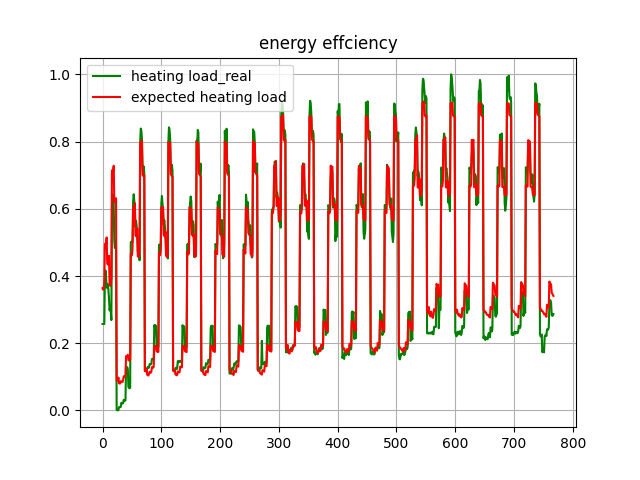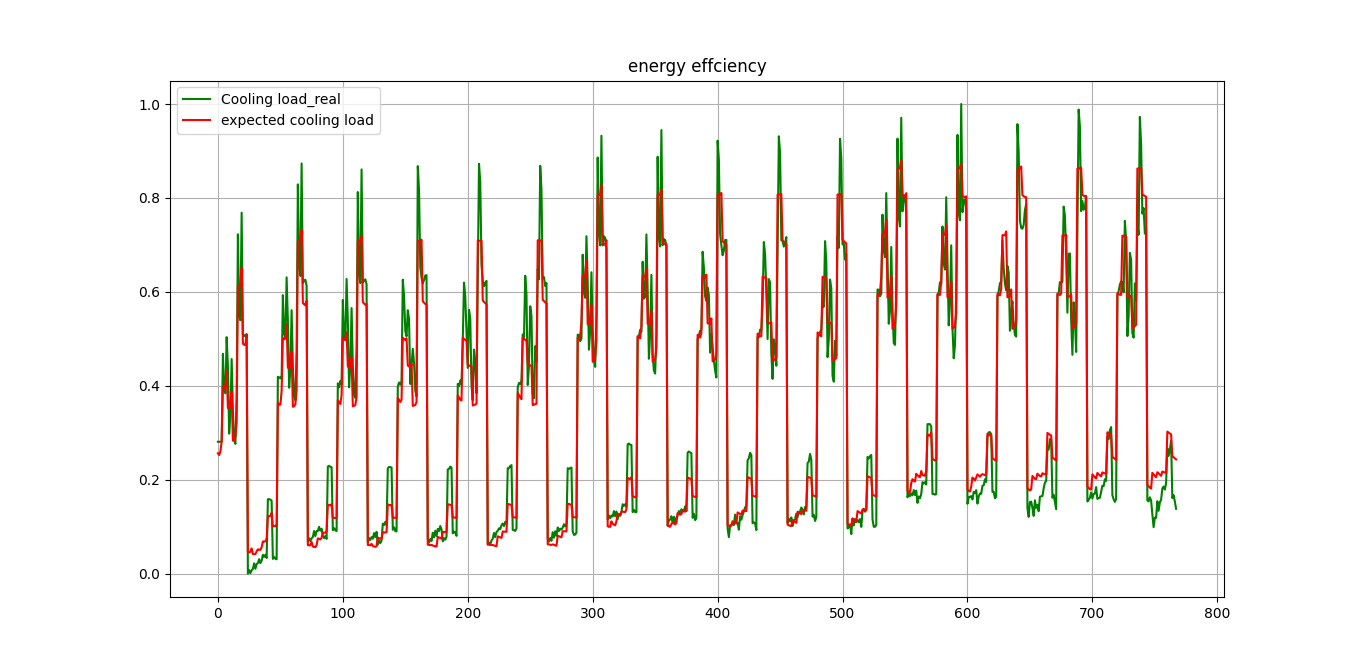

In [ ]:
input('\nPress enter to view Result...')
##testing the the network
for row in dataCleaningandSplitting(data).testing_data():
    prediction = backpropagation.predict(network, row)
    # print('Input =', (row), 'Expected = ', backpropagation.getExpected(row, nOutputs), 'Result =', (prediction))
    print('Expected = ', backpropagation.getExpected(row, nOutputs), 'Result =', (prediction))



Press enter to view Result...
Expected =  [0.9355621461310326, 0.8007002423915971] Result = [0.8475367922785979, 0.787949473272023]
Expected =  [0.928012941493664, 0.7697279827632642] Result = [0.8484016244775516, 0.78867989733627]
Expected =  [0.22944189808573737, 0.16267169404793969] Result = [0.2599449943419101, 0.186012116095822]
Expected =  [0.2318684281477487, 0.17102073794775113] Result = [0.2617289914597327, 0.18757208669340245]
Expected =  [0.2289026691830682, 0.1650956100188527] Result = [0.26353701533817403, 0.18915881058478184]
Expected =  [0.23025074143974117, 0.17102073794775113] Result = [0.26536954192065626, 0.19077291845497327]
Expected =  [0.22917228363440278, 0.1669808779962295] Result = [0.247368443600936, 0.1829808745112495]
Expected =  [0.2315988136964141, 0.17802316186372208] Result = [0.24854496513229782, 0.18398268528256728]
Expected =  [0.2289026691830682, 0.1675195259897657] Result = [0.2497353881626963, 0.18499949735810864]
Expected =  [0.23105958479374494,

<Figure size 432x288 with 0 Axes>

In [ ]:
def writeWieghtsToFile(network):
    my_df = pd.DataFrame(network)
    my_df.to_csv('my_array.csv',header = False, index= False)
writeWieghtsToFile(network)

In [ ]:
Y1=list()
Y2=list()
for row in dataCleaningandSplitting(data).testing():
    Y1.append(backpropagation.predictY1(network, row))
    Y2.append(backpropagation.predictY2(network, row))


<Figure size 432x288 with 0 Axes>

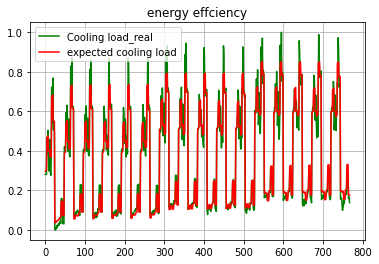

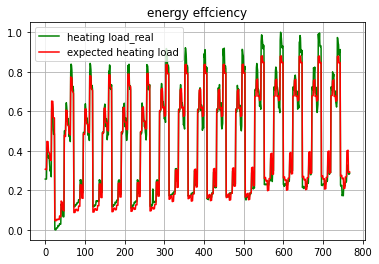

In [ ]:
fig, ax = plt.subplots()
plt.title("energy effciency")
ax.plot(list(data['Y2']), color = 'green', label = 'Cooling load_real')
ax.plot(Y2, color = 'red', label = 'predicted cooling load')
ax.legend(loc = 'upper left')
plt.grid()


fig2 , ax2 = plt.subplots()
plt.title("energy effciency")
ax2.plot(list(data['Y1']), color = 'green', label = 'heating load_real')
ax2.plot(Y1, color = 'red', label = 'predicted heating load')
ax2.legend(loc = 'upper left')
plt.grid()
plt.show()